<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [83]:
# !pip install ydata_profiling

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [85]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [86]:
df = pd.concat([df_train, df_test])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [87]:
print("ПРОПУСКИ В ДАННЫХ:")
print(df.isna().sum())
print("\nЯВНЫЕ ДУБЛИКАТЫ:")
print(df.duplicated().sum())

ПРОПУСКИ В ДАННЫХ:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

ЯВНЫЕ ДУБЛИКАТЫ:
1170


In [88]:
from ydata_profiling import ProfileReport
# в одну строку
profile = ProfileReport(
    df, 
    tsmode=True, 
    sortby="year", 
    title="Time-Series EDA",
    correlations={"auto": {"calculate": False}})  # отключаем автоматический расчет корреляций
profile.to_file("report_timeseries.html")

# Сравним тестовые и тренировочные данные
train_report = ProfileReport(df_train, title="Train", correlations={"auto": {"calculate": False}})
test_report = ProfileReport(df_test, title="Test", correlations={"auto": {"calculate": False}})

comparison_report = train_report.compare(test_report)
comparison_report.to_file("comparison.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 53.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 665.30it/s]


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 3240.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Ваш ответ здесь.**

Есть пропуски в некоторых полях датасета и 1170 явных дубликатов.

Согласно дашборду:
- Наиболее частые авто в датасете - это maruti, hyunday, tata, swift, mahindraa, bsiv, обычно на дизельном или бензиновом двигателе, реже на CNG, LPG, частные автомобили или автомобили от дилеров, один или два собственника, с ручной трансмиссией, с объемом двигателя 1119, 1248, 2179, 998, 1498, 796 кубических сантиметра, 5-местные с ручной трансмиссией, максимальной мощностью 74 bhp, крутящим моментом 4000, 3500 или 2000 оборотов в минуту 
- В датасете представлены данные с 1983 по 2020 год. Средняя цена автомобиля 636 813 у. е., средний пробег 69 810 км
- Цена росла со временем
- Наиболее частые дубликаты по автомобилям Jaguar XF 2.0 Diesel Portfolio, Lexus ES 300h, Honda Amaze V CVT Petrol BSIV

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [89]:
# Ваш код здесь
print("По числовым столбцам:")
print("Train:")
display(df_train.describe(include=['number']))
print("Test:")
display(df_test.describe(include=['number']))
print("По категориальным столбцам:")
print("Train:")
display(df_train.describe(include=['object']))
print("Test:")
display(df_test.describe(include=['object']))

По числовым столбцам:
Train:


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Test:


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


По категориальным столбцам:
Train:


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Test:


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Средняя стоимость автомобиля в контрольной и тестовой группе составляет 639 515 и 617 901 у. е. соответственно. Среднекквадратичное отклонение сотимости автомобиля очень большое, что говорит о присутствии в выборке слишком дорогих и слишком дешевых автомобилей. Минимальная стоимость автомобиля в контрольной и тестовой группах 29 999 и 31 000 у. е. соответственно. В обеих выборках представлены автомобили, у которых в среднем 5-6 мест с пробегом 69 584 и 71 393 км пробега в контрольной и тестовой выборках соответственно.

При анализе категориальных переменных было выявлено, что всего 4, 3, 2, 5 типов товплива, продавцов, трансмиссии и собственников соответственно. Переменные название комплектации авто, расход топлива, объем двигателя, максимальная мощность двигателя и крутящий момент имеют разное, но конечное число значений (сначала могло показаться, что это числовые переменные, но на самом деле это высокоселективные категориальные переменные с конечным числом значений). Наиболее частый кандидат в обеих выборках - это дизельный Maruti Alto 800 LXI в частном владении с ручной трансмиссией, одним владельцем, объемом двигателя	18.6/18.9 kmpl, объемом двигателя 1248 CC и максимальной мощностью двигателя 74 bhp.

При сравнении среднего и медианы для тестовой и контрольной групп можно увидеть, что средняя стоимость автомобиля внутри `train` и `test` больше медианы, что говорит о правосторонней скошенности распределения, что бизнесово означает, что есть небольшое количество автомобилей в выборке, которые имеют космическую стоимость и перекашивают распределение вправо.

Данные согласуются с дашбордом, построенным ранее


### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [90]:
X_train = df_train.drop(columns=['selling_price'])
X_test = df_test.drop(columns=['selling_price'])
display(df_train[df_train.duplicated(subset=X_train.columns, keep='first')])
print(f"\nВсего в трейне {len(df_train[df_train.duplicated(subset=X_train.columns, keep='first')])} дубликатов")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0



Всего в трейне 1159 дубликатов


In [91]:
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')
df_train = df_train.reset_index(drop=True)

In [92]:
assert df_train.shape == (5840, 13)

Скрытыми дублями могут быть те, где
1) Записи совпадают по подмножеству полей
2) Записи отличаются только по регистру (нарушена орфография, перепутаны заглавная и маленькие буквы и т.д.)
3) Форматы записи полей не приведены к единому стандарту, одно и то же написано по-разному.

Как решить такую проблему:
1) У метода duplicated есть аргумент subset, по которому можно искать дубликаты по подмножеству полей
2) Можно использовать регулярные выражения для поиска совпадений
3) Можно использовать регулярные выражения для поиска схожих паттернов или, как вариант, метрики, которые показывают, какова доля совпадений в строках с учетом порядка (например, расстояние Левенштейна, LCS и т.д.), но если считать наивным образом все со всеми, то это будет накладно.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [93]:
# your code here
df_train['mileage'] = df_train['mileage'].str.split(' ').str[0].apply(float)
df_test['mileage'] = df_test['mileage'].str.split(' ').str[0].apply(float)

df_train['engine'] = df_train['engine'].str.split(' ').str[0].apply(float)
df_test['engine'] = df_test['engine'].str.split(' ').str[0].apply(float)

df_train['max_power'] = df_train.loc[df_train['max_power'] != ' bhp', 'max_power'].str.split(' ').str[0].apply(float)
df_test['max_power'] = df_test.loc[df_test['max_power'] != ' bhp', 'max_power'].str.split(' ').str[0].apply(float)

In [94]:
# <Число>nm@ <Число>rpm
# <Число>Nm@ <Число>-<Число>rpm
# <Число> Nm at <Число>-<Число>rpm
# <Число>Nm@ <Число>~<Число>rpm

# <Число>kgm@ <Число>rpm
# <Число> kgm at <Число>-<Число>rpm
# <Число>@ <Число>(kgm@ rpm)

def extract_torque(input):
    # Если не получится паттернами определить, что есть что
    if pd.isna(input):
        return pd.Series([np.nan, np.nan])

    torque = None
    max_torque_rpm = None
    
    input = input.lower()

    if 'at' in input:
        torque_part = input.split(' at ')[0].strip()
        rpm_part = input.split(' at ')[1].strip()
    elif '@' in input:
        torque_part = input.split('@')[0].strip()
        rpm_part = input.split('@')[1].strip()
    elif '/' in input:
        torque_part = input.split('/')[0].strip()
        rpm_part = input.split('/')[1].strip() + 'm'
    else:
        return pd.Series([float(input.rstrip('nm')), np.nan])

    # Крутящий момент в Н*м
    if 'nm' in input:
        torque = float(torque_part.split('nm')[0].strip())
    elif 'kgm' in input:
        torque = float(torque_part.split('kgm')[0].strip()) * 9.80665 # Переводим кгс*м в Н*м

    # Обороты в минуту
    if '-' in rpm_part:
        max_torque_rpm = float(rpm_part.split('-')[1].split('(')[0].split('rpm')[0].strip().replace(',', '.'))
    elif '~' in rpm_part:
        max_torque_rpm = float(rpm_part.split('~')[1].split('(')[0].split('rpm')[0].strip().replace(',', '.'))
    else:
        try:
            max_torque_rpm = float(rpm_part.split('rpm')[0].split('(')[0].strip().replace(',', '.'))
        except: # Если данные плохие
            return pd.Series([torque, np.nan])
    return pd.Series([torque, max_torque_rpm])

In [95]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(extract_torque)
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(extract_torque)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`

In [96]:
print("По числовым столбцам:")
print("Train:")
display(df_train.describe(include=['number']))
print("Test:")
display(df_test.describe(include=['number']))

По числовым столбцам:
Train:


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5654.000000,5656.000000,5644.000000,5654.00000,5643.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1435.418111,88.103070,175.750791,5.44075,2890.301081
std,4.095622,5.354320e+05,6.007114e+04,4.051002,492.453262,32.131943,108.850976,0.99527,1098.768411
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.00000,1.800000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,111.700000,5.00000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.00000,2800.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,200.055660,5.00000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.00000,5300.000000


Test:


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,981.000000,981.000000,981.000000,980.000000,981.000000,977.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1458.882773,91.015627,178.027936,5.410805,2967.263951
std,4.012149,7.585539e+05,48486.218662,3.989872,526.228560,35.207383,104.736912,0.919985,1057.313330
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,48.000000,4.000000,2.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.000000,69.000000,110.000000,5.000000,2200.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,171.800000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,213.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,1421.964250,9.000000,5200.000000


In [97]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns

df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].median())
df_test[numeric_columns] = df_test[numeric_columns].fillna(df_train[numeric_columns].median())

In [98]:
print(df_train.isna().sum())
print(df_test.isna().sum())

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


Как можно увидеть выше, у большинства переменных с пропущенными значениями скошенное вправо распределение. В случае со скошенными распределениями лучше использовать медиану вместо среднего, потому что она более репрезентативна и устойчива к выбросам.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [99]:
# your code here
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

display(df_train.dtypes)
display(df_test.dtypes)

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
torque            float64
seats               int64
max_torque_rpm    float64
dtype: object

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
torque            float64
seats               int64
max_torque_rpm    float64
dtype: object

`Your answer here`

Seats можно рассмотреть как категориальную, потому что она принимает конечное количество значений, а также потому что связь между числом мест и целевой переменной может быть нелинейной и важно будет найти связь именно между дискректными значениями переменной.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [100]:
# Ваш код здесь
print("По числовым столбцам:") # Потому что меняли только их
print("Train:")
display(df_train.describe(include=['number']))
print("Test:")
display(df_test.describe(include=['number']))

По числовым столбцам:
Train:


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.222169,5.426712,2887.254966
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,107.046059,0.982344,1080.196948
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,1.800000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,2800.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.013915,5.000000,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.000000,5300.000000


Test:


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,177.667377,5.403000,2963.416880
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,103.713939,0.912921,1045.372222
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,48.000000,4.000000,2.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,111.700000,5.000000,2250.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,160.000000,5.000000,2800.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,1421.964250,9.000000,5200.000000


`Your answer here`

Да, есть основания предполагать, что распределения поменялись после заполнения пропусков. Мы увеличили число наблюдений с медианами в данных, соответственно медиана начала смещаться в сторону среднего, то есть распределение начало становиться ближе к нормальному

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 2000x2000 with 0 Axes>

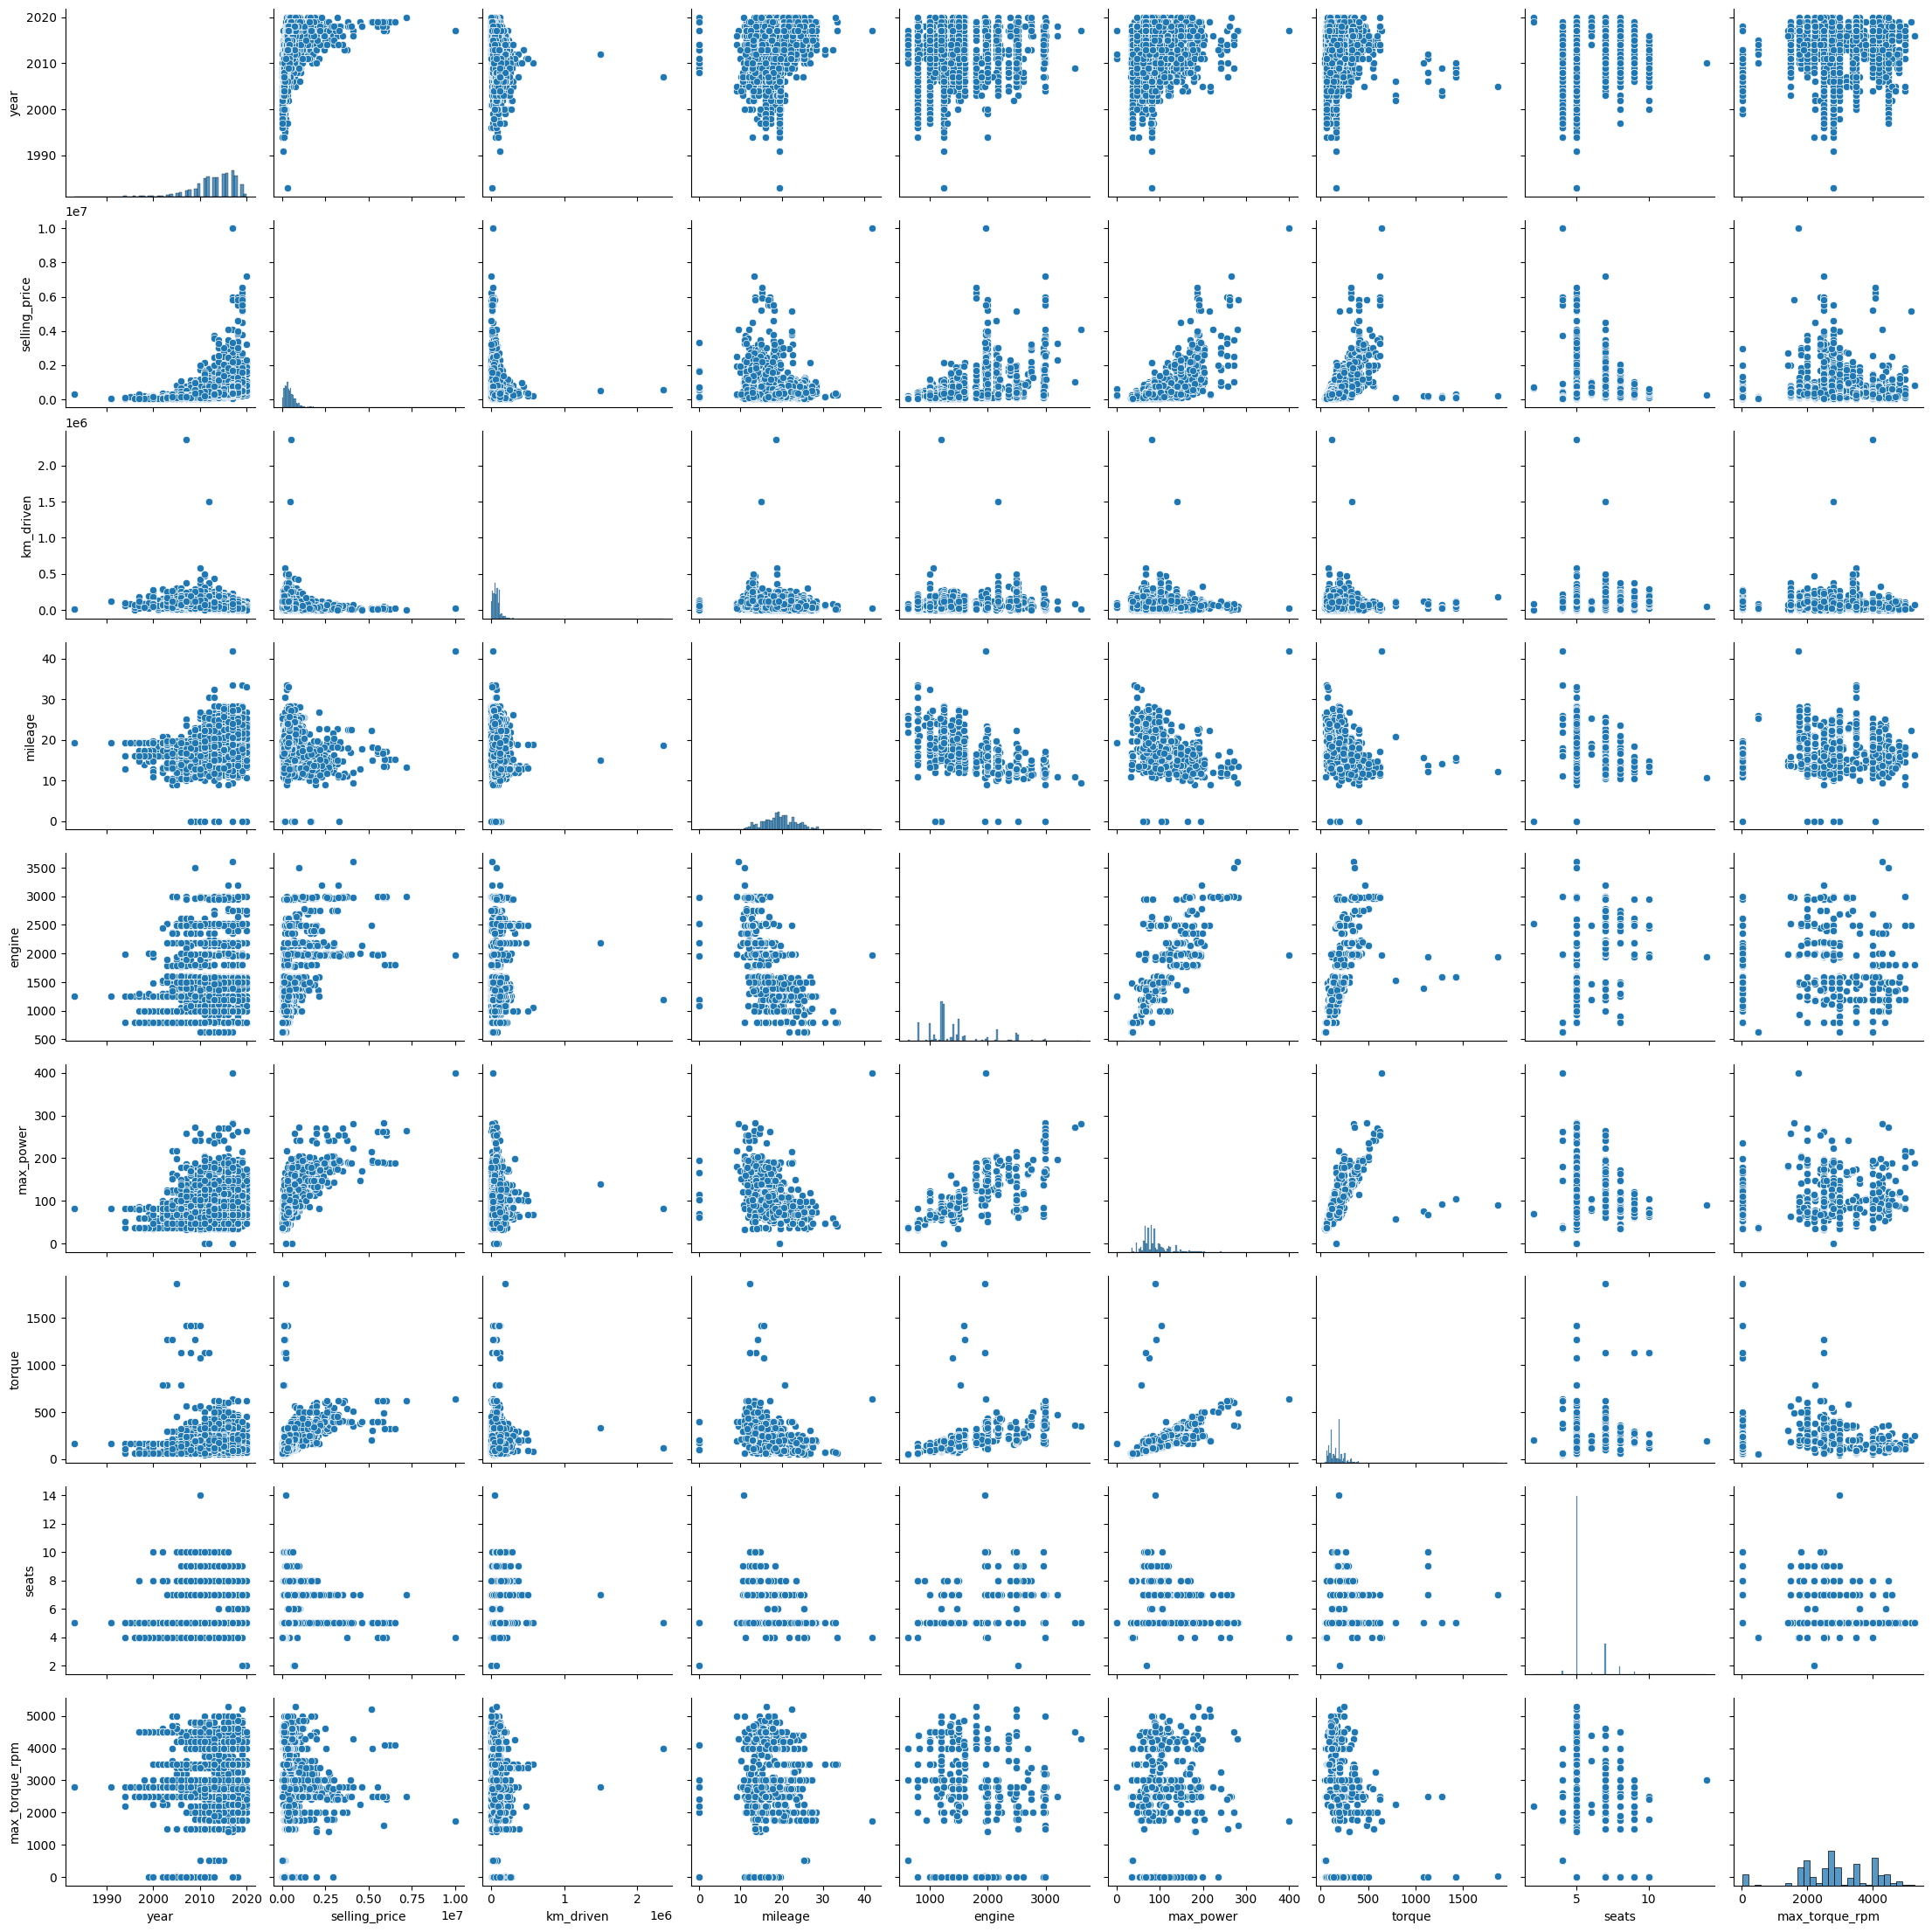

In [101]:
# your code here
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.pairplot(df_train)
plt.show()


На основе парных распределений можно предположить связь признаков с целевой переменной и корреляцию признаков между собой. Например, в глаза бросается , что между максимальной мощностью и крутящим моментом, объемом двигателя и максимальной мощностью, объемом двигателя и крутящим моментом есть линейная связь, стоимость автомобилей растет экспоненциально по годам

<Figure size 2000x2000 with 0 Axes>

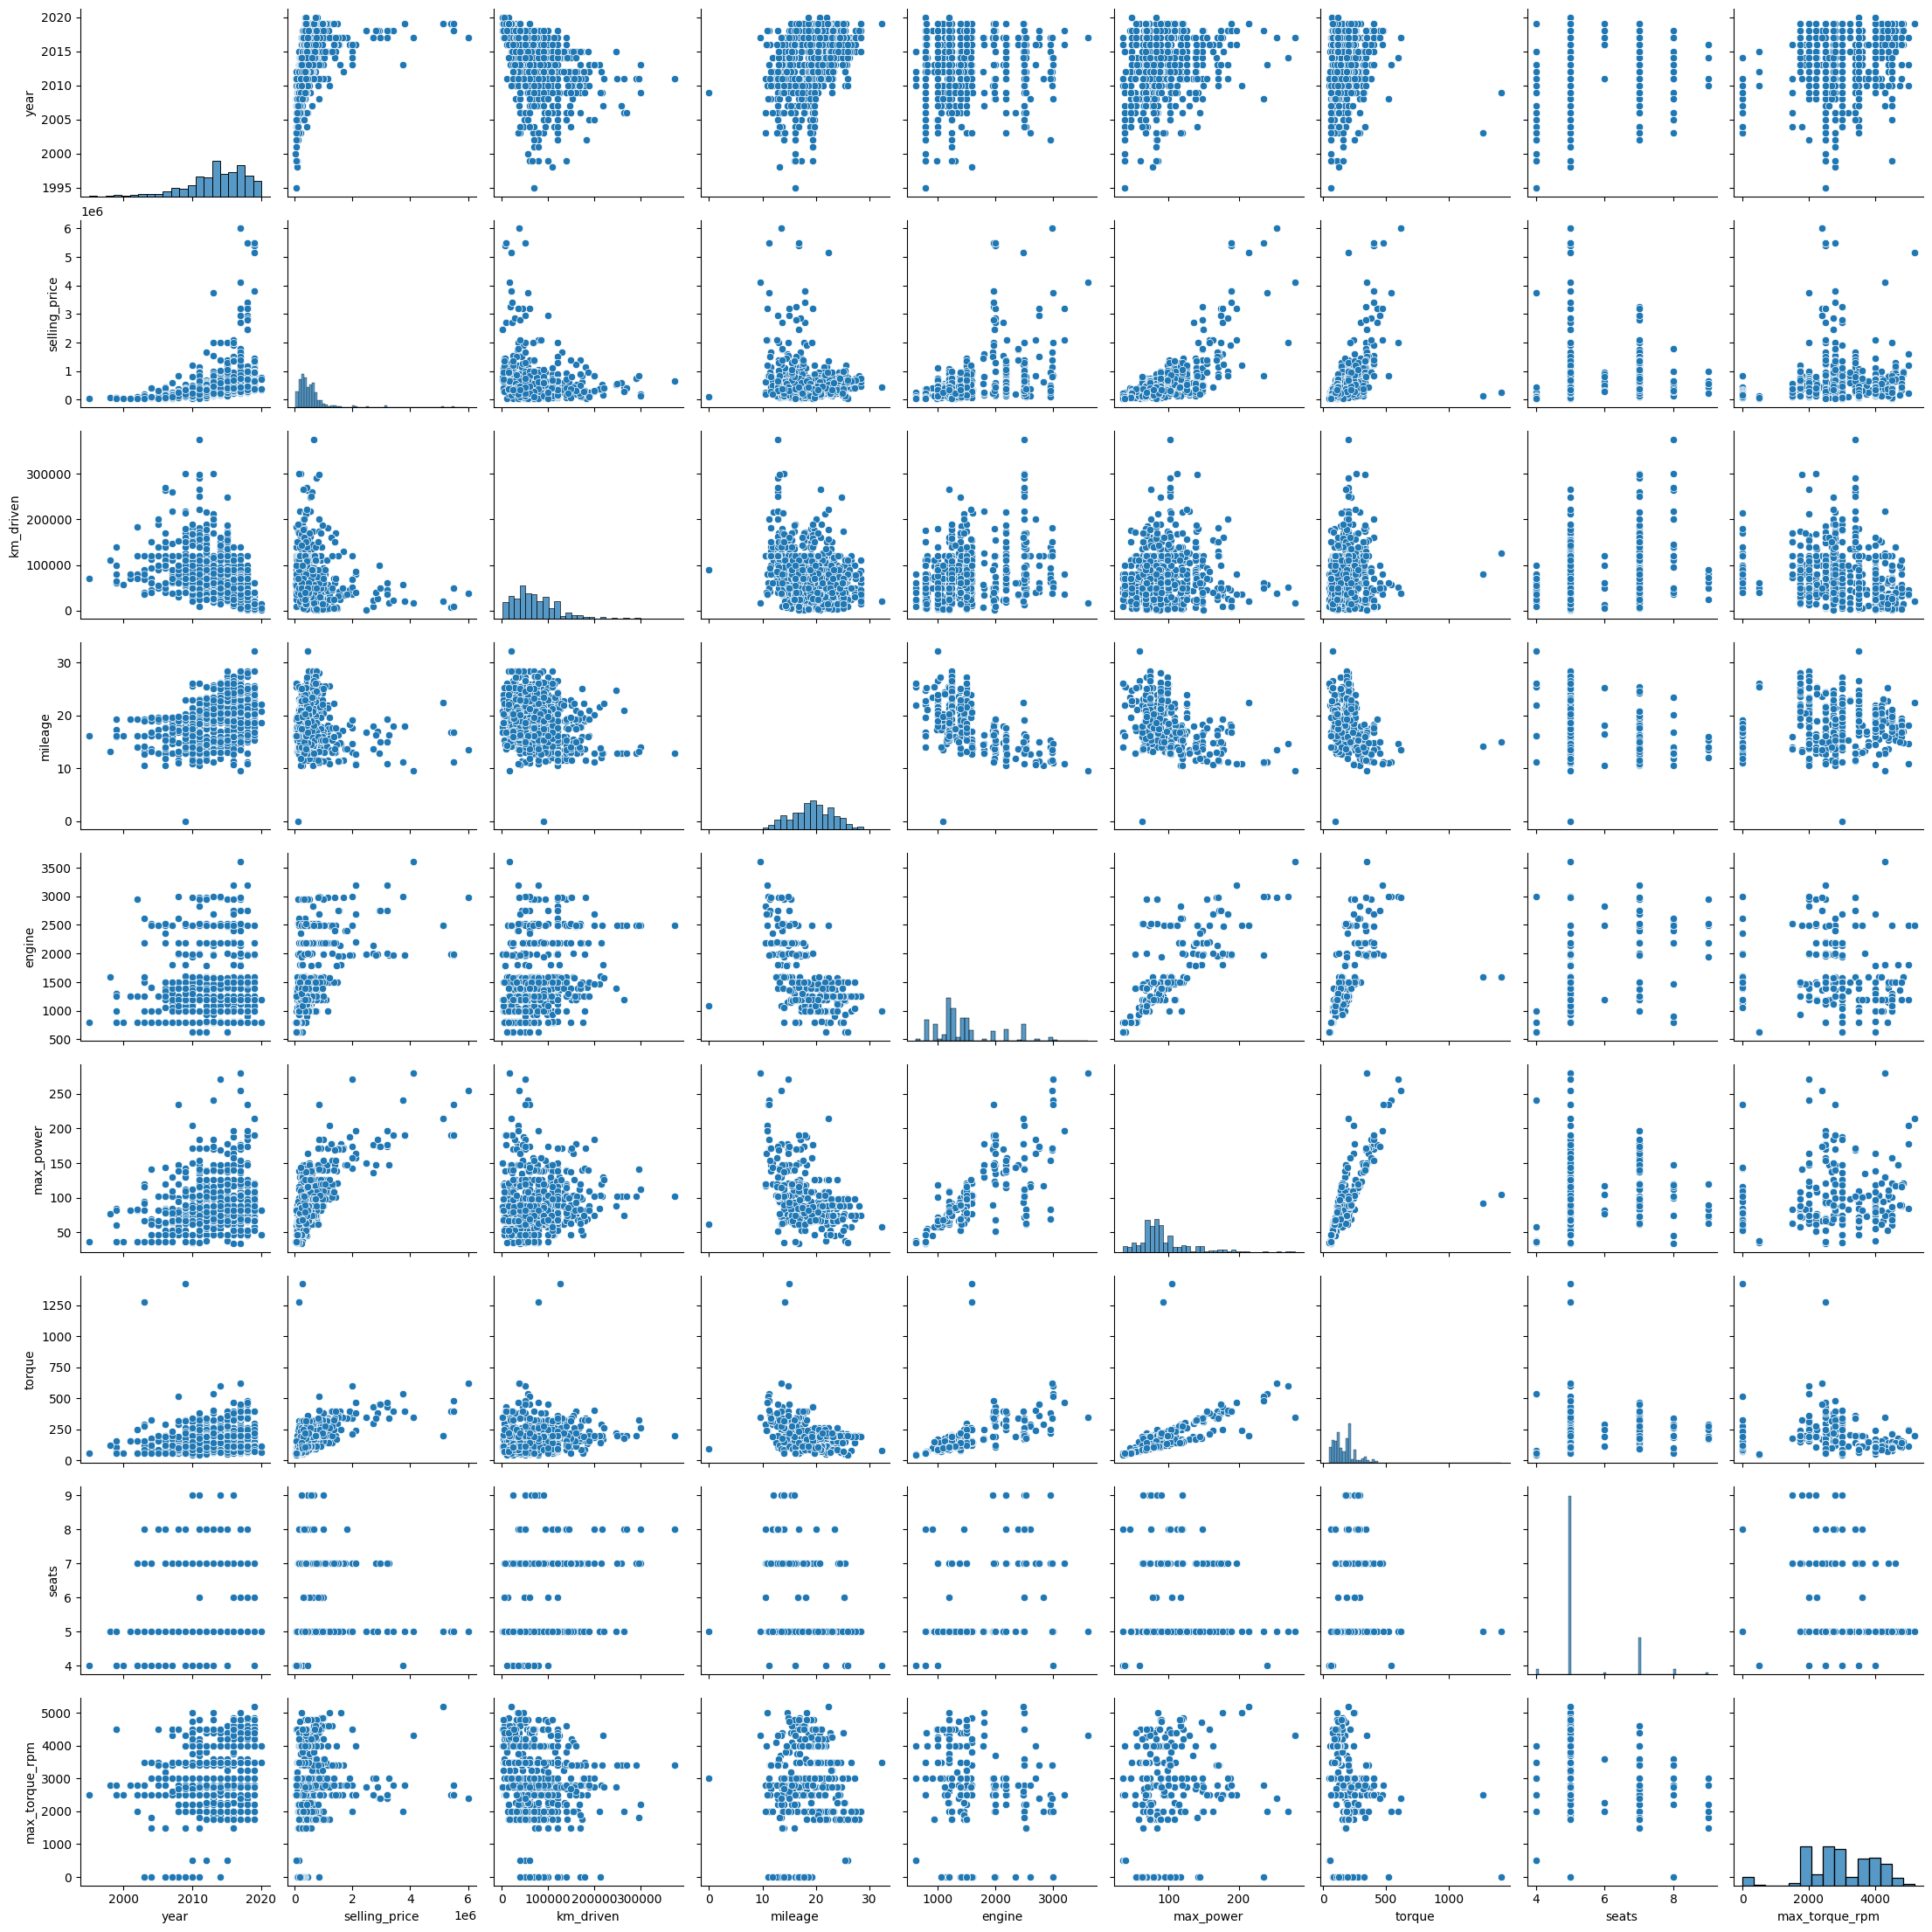

In [102]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_test)
plt.show()

В целом распределения похожи, но в тренировочной выборке представлены в основном автомобили с маленьким пробегом, а на инференсе есть автомобили также с большим пробегом. То есть модель будет обучаться предсказывать стоимость только для авто с низким пробегом, а оценивать авто также с большим пробегом, то есть не обучится на авто с большим пробегом и будет показывать плохое качество на них.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

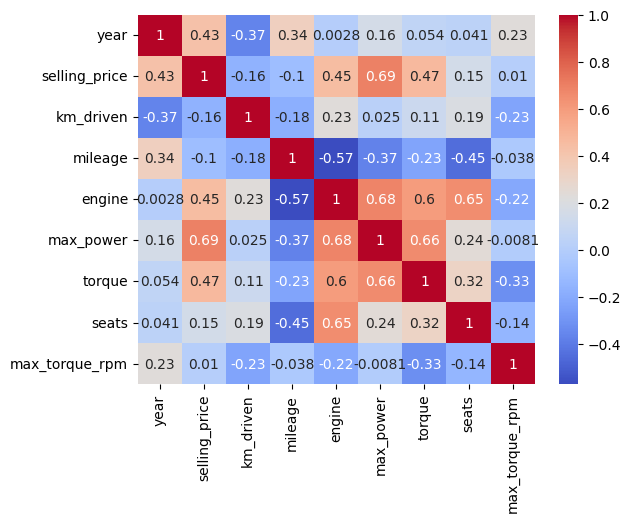

In [103]:
# your code here
corr = df_train[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

`Your answer here`

- Наименее скоррелированы между собой объем двигателя и год.

- Довольно сильная положительная линейная связь между максимальной мощностью и объемом двигателя, максимальной мощностью и крутящим моментом, местами и объемом двигателя, что согласуется с логикой.

- Согласно данным, между годом и пробегом отрицательная корреляция, что есть взаимосвязь: чем меньше год, тем больше километров проехала машина к дате продажи, но это не говорит о причиннно-следственной связи.

- По умолчанию корреляция Пирсона, есть еще возможность использовать Спирмена (измеряет любую зависимость, не только линейную, использует ранги, устойчив к выбросам и не требует нормального распределения, используют, когда есть выбросы, данные в порядковой шкале, данные имеют нелинейную зависимость), Кендалла (измеряет любую зависимость, не только линейную, основан на согласованных и несогласованных парах, робастный для малых выборок, используют когда выборка маленькая, много одинаковых значений) и кастомную функцию для расчета корреляции

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


Реализуем корреляцию Кендалла. Ее формула:
$$\tau=\frac{(C-D)}{\sqrt{(n_0-T_x)\cdot(n_0-T_y)}}, \text{где } n_0=\frac{n\cdot(n-1)}{2}$$
$T_X \text{и } T_y$ - это число пар в X и Y соответственно, в которых числа равны (= ранги одинаковые), $C \text{ и } D$ - это число пар, в которых ранги в паре наблюдений из X и в паре наблюдений из Y совпадают или не совпадают соответственно

In [104]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau

def kendall_tau_manual(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)

    concordant = 0
    discordant = 0
    x_ties = 0
    y_ties = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            x_diff = x[i] - x[j]
            y_diff = y[i] - y[j]
            
            product = x_diff * y_diff
            
            if product > 0:
                concordant += 1
            elif product < 0:
                discordant += 1
            
            if x_diff == 0:
                x_ties += 1
            if y_diff == 0:
                y_ties += 1
    
    n0 = n * (n - 1) // 2

    numerator = concordant - discordant
    denominator = np.sqrt((n0 - x_ties) * (n0 - y_ties))
    
    if denominator == 0:
        tau = 0.0
    else:
        tau = numerator / denominator
    
    return tau

In [105]:
print(kendall_tau_manual(df_train['mileage'], df_train['km_driven']))

-0.13440500601874747


In [106]:
# your code here
corr = df_train[numeric_columns].corr(method='kendall')
corr

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.538725,-0.420488,0.243393,-0.028928,0.113885,0.075637,0.038452,0.133321
selling_price,0.538725,1.000000,-0.200974,0.030274,0.334230,0.447354,0.426787,0.255972,-0.010704
km_driven,-0.420488,-0.200974,1.000000,-0.134405,0.211973,0.028386,0.162999,0.157407,-0.245570
mileage,0.243393,0.030274,-0.134405,1.000000,-0.299252,-0.204517,-0.111302,-0.348042,-0.073670
engine,-0.028928,0.334230,0.211973,-0.299252,1.000000,0.578844,0.683583,0.438647,-0.231820
max_power,0.113885,0.447354,0.028386,-0.204517,0.578844,1.000000,0.631883,0.248027,-0.021785
torque,0.075637,0.426787,0.162999,-0.111302,0.683583,0.631883,1.000000,0.357401,-0.289465
seats,0.038452,0.255972,0.157407,-0.348042,0.438647,0.248027,0.357401,1.000000,-0.126202
max_torque_rpm,0.133321,-0.010704,-0.245570,-0.073670,-0.231820,-0.021785,-0.289465,-0.126202,1.000000


`Your answer here`

Результат ручного вычисления и вычисления через библиотеку совпадают между собой. 

Довольно сильную положительную зависимость можно наблюдать между объемом двигателя и крутящим моментом, максимальной мощностью и крутящим моментом, годом и ценой продажи, сильную отрицательную между пробегом и годом, что в целом согласуется с логикой. В отличие от результатов, полученных ранее, мы также нашли нелинейные взаимосвязи между переменными, и снизили влияние выбросов на корреляцию

Теперь рассчитаем с использованием `phik`. Переменную name исключим, так как она высокоселективная категориальная.

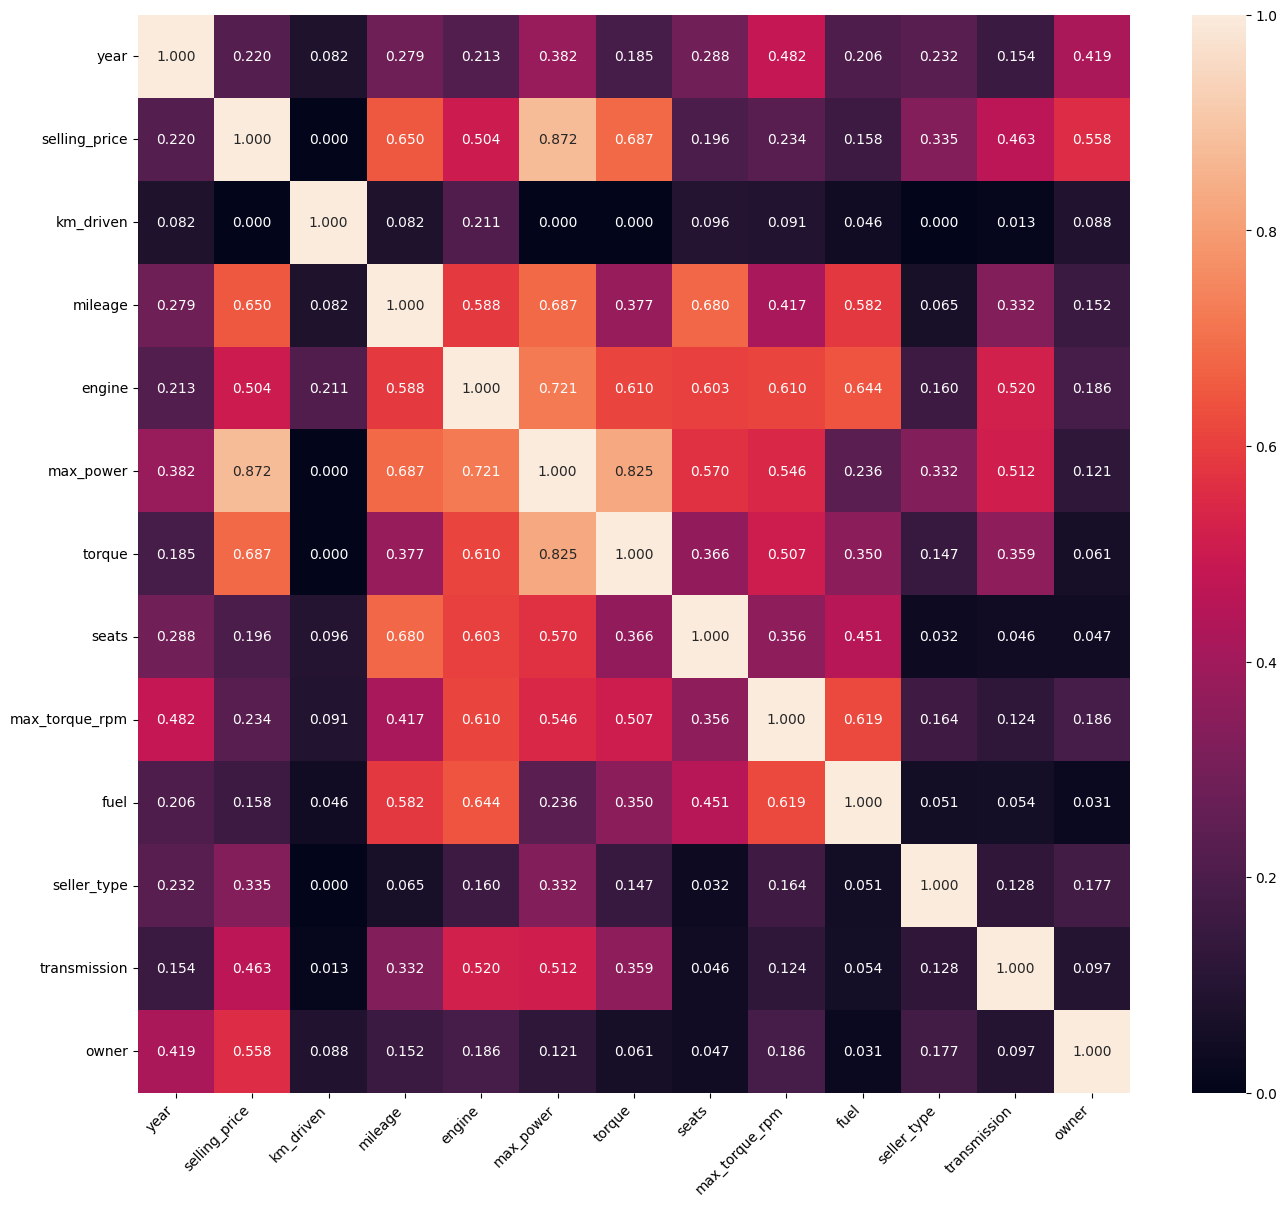

In [107]:
from phik import phik_matrix, report

interval_cols = ['year', 'selling_price', 'km_driven', 'mileage', 
                 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
nominal_cols = ['fuel', 'seller_type', 'transmission', 'owner']

all_cols = interval_cols + nominal_cols

phik_corr = df_train[all_cols].phik_matrix(interval_cols=interval_cols)


plt.figure(figsize=(16, 14))
sns.heatmap(phik_corr, 
            annot=True, 
            fmt='.3f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [108]:
# # Можно также выгрузить в формате отчета
# report.correlation_report(df_train[all_cols], 
#                         interval_cols=interval_cols, 
#                         pdf_file_name='correlation_report.pdf',
#                         verbose=False)

Согласно этой матрице корреляций, наибольшая корреляция между максимальной мощностью и ценой продажи, между максимальной мощностью и крутящим моментом.

Наименьшая коррелляция между типом продавца и пробегом, крутящим моментом и пробегом, максимальной мощностью и пробегом.

Обратим внимание, что с помощью этой библиотеки можно смотреть на корреляцию между категориальными переменными. Например, тип топлива слабо коррелирует с типом продавца, типом трансмиссии и типом продавца, что в целом согласуется с логикой.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [109]:
# your code here


# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

`Your answer`

Мы полученные обработанные тренировочный и тестовый датасеты склеим вместе и будем разбивать через `train_test_split`, потому что, как мы увидели ранее, в одной из выборок авто только с маленьким пробегом. Чтобы убрать проблемы при обучении мы просто склеим их, разделим с помощью этой функции зашафленные данные. Так мы будем гарантировать, что модель обучится также на авто с большим пробегом

In [110]:
df = pd.concat([df_train, df_test])
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


In [111]:
from sklearn.model_selection import train_test_split

# train_test_split автоматически создаст копии данных, а не ссылки на них
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns].drop(columns=['selling_price']), df['selling_price'], test_size=0.3, random_state=42, shuffle=True)

#### Опишите выбранные вещественные признаки

- 'year' — год выпуска автомобиля

- 'km_driven' — пробег

- 'mileage' — расход топлива автомобиля (например, км/л)

- 'engine' — объем двигателя (куб. см)

- 'max_power' — максимальная мощность двигателя (лошадиные силы)

- 'torque' — максимальный крутящий момент (Нм)

- 'seats' — количество посадочных мест

- 'max_torque_rpm' — число оборотов двигателя для достижения макс. крутящего момента


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f"R^2: {r2}, MSE: {mse}")

R^2: 0.5871311276980651, MSE: 146583459685.59488


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [113]:
def r2(y_true, y_pred):
    return 1 - (np.mean((y_true - y_pred) ** 2) / np.var(y_true))

r2(y_test, y_pred)


np.float64(0.5871311276980651)

`Your answer here`

$$ R^2=1-\frac{RSS}{TSS} $$

$ RSS $ - это сумма квадратов остатков, TSS - это сумма квадратов отклонений от среднего (дисперсия целевой переменной). Когда мы из $TSS$ вычитаем сумму квадратов остатков, то мы из общей дисперсии целевой переменной вычитаем дисперсию, которая приходится на случайную компоненту модели - таким образом, у нас остается доля дисперсии целевой переменной, которую получилось объяснить моделью.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [114]:
# your code here
def adjusted_r2(y_true, y_pred, n, p):
    return 1 - ((1 - r2(y_true, y_pred)) * (n - 1) / (n - p - 1))

adjusted_r2(y_test, y_pred, len(y_test), len(X_test.columns))

np.float64(0.5855144116048612)

`Your answer here`

$R^2_{adj}$ стоит использовать, когда нужно сравнить модели с разным числом признаков. Эта метрика штрафует за большое число переменных в отличие от обычного $R^2$, который будет расти с добавлением числа переменных. То есть эта метрика c поправкой на число переменных будет поощрять модели с минимальным числом признаков, которые могут объяснить бОльшую часть дисперсии целевой переменной

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_transformed, y_train)
y_pred_scaled = model.predict(X_test_transformed)

r2 = r2_score(y_test, y_pred_scaled)
mse = MSE(y_test, y_pred_scaled)
print(f"R^2 после стандартизации: {r2}")
print(f"MSE после стандартизации: {mse}")

R^2 после стандартизации: 0.5871311276980646
MSE после стандартизации: 146583459685.59503


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [116]:
print(f"Наиболее информативный признак: {X_train.columns[model.coef_.argmax()]}")
print(f"Коэффициент: {model.coef_[model.coef_.argmax()]:.2f}")

Наиболее информативный признак: max_power
Коэффициент: 332246.09


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [117]:
print(model.coef_)
print(X_train.columns.values)

[ 1.73439032e+05 -4.76773632e+04  2.29980868e+02  5.17920657e+04
  3.32246087e+05  1.49261966e+04 -4.32227612e+04 -2.78266929e+04]
['year' 'km_driven' 'mileage' 'engine' 'max_power' 'torque' 'seats'
 'max_torque_rpm']


In [118]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()
model.fit(X_train_transformed, y_train)
y_pred_lasso = model.predict(X_test_transformed)

r2 = r2_score(y_test, y_pred_lasso)
mse = MSE(y_test, y_pred_lasso)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

R^2: 0.5871307087373216
MSE: 146583608431.89026


In [119]:
model.coef_

array([ 1.73438728e+05, -4.76761729e+04,  2.28230507e+02,  5.17875768e+04,
        3.32246746e+05,  1.49263575e+04, -4.32200008e+04, -2.78259171e+04])

L1-регуляризация с параметрами по умолчанию не занулила веса. Это может быть связано с тем, что 

1) вклад переменных модели в целевую переменную довольно высокий и значимый
2) значение по умолчанию недостаточно большое, чтобы так сильно штрафовать за небольшие отклонения за счет активаций признаков
3) После стандартизации все признаки стали в масштабе от -1 до 1, с нормальным распределением, поэтому штраф за любой признак одинаковый и регуляризация не может выбросить какой-то определенный признак

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [1, 10, 100, 1000, 10000],
    'selection': ['cyclic', 'random'],
    'max_iter': [300, 500, 1000, 2000]
}

grid = GridSearchCV(
    Lasso(random_state=42),
    param_grid,
    cv=10,
    scoring='r2'
)

grid.fit(X_train_transformed, y_train)

print(f"Лучшие параметры: {grid.best_params_}")
print(f"Best test R²: {grid.best_estimator_.score(X_test_transformed, y_test):.4f}")

y_pred = grid.best_estimator_.predict(X_test_transformed)
test_mse = MSE(y_test, y_pred)
print(f"Best test MSE: {test_mse:.4f}")

n = len(grid.cv_results_['params'])
print(f"\n{n} моделей было обучено")
print(f"{grid.best_params_['alpha']} - лучший alpha")


Лучшие параметры: {'alpha': 1000, 'max_iter': 300, 'selection': 'cyclic'}
Best test R²: 0.5868
Best test MSE: 146683431396.2998

40 моделей было обучено
1000 - лучший alpha


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [121]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_elastic = GridSearchCV(
    ElasticNet(random_state=42),
    param_grid_elastic,
    cv=10,
    scoring='r2'
)

grid_elastic.fit(X_train_transformed, y_train)

print(f"Лучшие параметры: {grid_elastic.best_params_}")
print(f"Best test R²: {grid_elastic.best_estimator_.score(X_test_transformed, y_test):.4f}")
y_pred = grid_elastic.best_estimator_.predict(X_test_transformed)
test_mse = MSE(y_test, y_pred)
print(f"Best test MSE: {test_mse:.4f}")

n = len(grid_elastic.cv_results_['params'])
print(f"\n{n} моделей было обучено")

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.7}
Best test R²: 0.5829
Best test MSE: 148088732163.3294

25 моделей было обучено


По метрикам на тесте лучше Лассо регрессия

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [122]:
# your code here

In [123]:
assert X_train_cat.shape == (5840, 11)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.


In [124]:
import pickle

model_data = {
    'model': grid.best_estimator_,  # Лучшая Lasso модель из GridSearchCV
    'scaler': scaler,               # StandardScaler
    'feature_columns': list(X_train.columns),  # Список признаков
    'df_train': df_train  # Предобработанные данные для EDA
}

with open('model.pickle', 'wb') as f:
    pickle.dump(model_data, f)